<a href="https://colab.research.google.com/github/Modinat-A/Diabeties-Prediction/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative analysis of Regressors

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import itertools
import sklearn as skl
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor

In [ ]:
df = pd.read_csv('CE802_P3_Data.csv')

In [ ]:
df.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.00,1.73,3.14,5.73,-5.48,-743.61,152.20,Europe,3,1577.82,-383.82,12,-2289.14,-19.69,High,25354.83,167.75
1,9.84,3.46,6.02,14.42,-10.94,-820.35,68.56,Rest,4,1884.69,-488.34,6,-2899.20,-19.46,Very low,32380.17,704.46
2,4.14,-1.95,6.96,4.27,-7.94,-818.43,107.86,Rest,4,2063.79,-287.76,6,-2885.52,-20.57,Very high,28882.38,302.43
3,20.06,-3.34,3.76,4.78,-6.30,-814.53,147.04,UK,7,1319.19,-435.54,4,-2319.80,-20.24,Very high,28523.04,2420.98
4,63.63,-0.97,11.08,5.66,-9.60,-847.41,99.70,Europe,1,1921.14,-246.45,10,-1344.40,-21.90,Medium,27915.81,271.65


In [ ]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,63.602773,-0.104847,8.109187,4.041660,-8.765747,-815.349400,123.191920,3.947333,1334.90566,-341.195900,7.885333,-2173.617040,-20.066667,24202.705020,922.082533
std,774.154296,3.040026,5.812853,2.893909,6.048501,126.724179,58.613624,1.836702,904.26205,89.572842,3.620072,592.936195,4.183142,13329.106617,1092.331874
min,0.000000,-10.170000,0.080000,0.040000,-27.620000,-1658.250000,-56.180000,0.000000,-1743.24000,-697.350000,0.000000,-4161.840000,-36.320000,-35082.450000,0.000000
25%,0.130000,-2.060000,3.815000,1.945000,-13.000000,-875.347500,83.900000,3.000000,732.36000,-401.340000,6.000000,-2578.875000,-22.045000,18069.450000,0.000000
50%,1.010000,-0.000000,6.740000,3.415000,-8.760000,-815.535000,121.580000,4.000000,1324.15500,-341.055000,8.000000,-2179.270000,-20.085000,24205.875000,429.570000
75%,6.805000,1.875000,10.945000,5.492500,-4.520000,-752.130000,161.920000,5.000000,1962.12750,-278.595000,10.000000,-1763.605000,-18.175000,30911.280000,1530.205000
max,27474.530000,9.600000,45.140000,23.390000,9.280000,-243.840000,328.100000,11.000000,4487.55000,-25.530000,20.000000,-45.160000,7.550000,85263.240000,3960.010000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   object 
 8   F9      1500 non-null   int64  
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   object 
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [ ]:
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

In [ ]:
# Correlations
correlations = df.corr() 
# let's see how much each attribute correlates with Target
correlations['Target'].sort_values(ascending=False)

Target    1.000000
F7        0.430990
F3        0.357137
F4        0.346373
F13       0.300890
F9        0.193704
F6        0.031407
F16       0.029194
F1        0.027713
F5        0.020443
F11       0.015412
F2        0.011330
F14      -0.018677
F12      -0.236200
F10      -0.263022
Name: Target, dtype: float64

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

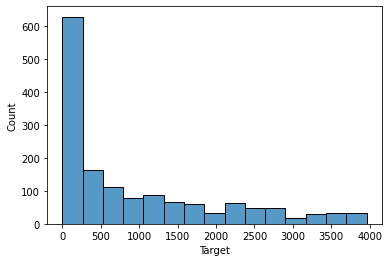

In [ ]:
_ = sns.histplot(y, kde=False)

In [ ]:
def scale_X(X):
    cat_features=['F8','F15']
    num_features = ['F1','F2','F3','F4','F5','F6','F7','F9','F10','F11','F12','F13','F14','F16']
    colTransformer = ColumnTransformer([
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
        ],
        remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
        )
    data = colTransformer.fit_transform(X)
    return data


In [ ]:
X = scale_X(X)

In [ ]:
X.shape

(1500, 23)

In [ ]:
y = y.values
y_transformer = MinMaxScaler(feature_range=(0, 1))
y = y_transformer.fit_transform(y.reshape(-1,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

# Linear Regression

In [ ]:
# use dummy regressor as bench mark
dummy_clf = DummyRegressor(strategy='mean')
dummy_scores = cross_val_score(dummy_clf, X_train, y_train.ravel(), cv=10, scoring = make_scorer(mse))
print("Dummy MSE: %0.8f +/- %0.8f" % (dummy_scores.mean(), dummy_scores.std()))

Dummy MSE: 0.07923554 +/- 0.01077776


In [ ]:
rg = LinearRegression()
rg.fit(X_train, y_train)
scores = cross_val_score(rg,X_train, y_train, cv=10,scoring=make_scorer(mse)) 
print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))

MSE: 0.01679106 +/- 0.00252107


In [ ]:
scores = cross_val_score(rg,X_train, y_train, cv=10,scoring=make_scorer(r2)) 
print("R squared of the model %0.8f +/- %0.8f" % (scores.mean(), scores.std()))

R squared of the model 0.78473074 +/- 0.03076897


In [ ]:
# Run on test data
y_pred = rg.predict(X_test)
print("MSE of the model = %1.4g" % mse(y_test, y_pred))

MSE of the model = 0.01626


# Support Vector Regression

In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train) 

# cross-validation of the MSE
scores = cross_val_score(svr,X_train, y_train.ravel(), cv=10,scoring=make_scorer(mse)) 
print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.01764333 +/- 0.00316564


In [ ]:
scores = cross_val_score(svr,X_train, y_train.ravel(), cv=10,scoring=make_scorer(r2)) 
print("R squared of the model %0.8f +/- %0.8f" % (scores.mean(), scores.std()))

R squared of the model 0.77445762 +/- 0.03463881


In [ ]:
# Run on test data
y_pred = svr.predict(X_test)
print("MSE of the model = %1.4g" % mse(y_test, y_pred))

MSE of the model = 0.01711


# XGBRegressor

In [ ]:
f = XGBRegressor(objective ='reg:linear', verbosity = 0,loss='squared_error', learning_rate=0.1, n_estimators=100,)
f.fit(X_train, y_train) 
r_sq = f.score(X_train, y_train)
scores = cross_val_score(f,X_train, y_train.ravel(), cv=10,scoring=make_scorer(mse)) 
print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))

MSE: 0.01498072 +/- 0.00170987


In [ ]:
scores = cross_val_score(f,X_train, y_train.ravel(), cv=10,scoring=make_scorer(r2)) 
print("R squared of the model %0.8f +/- %0.8f" % (scores.mean(), scores.std()))

R squared of the model 0.80807618 +/- 0.01994485


In [ ]:
# Run on test data
y_pred = f.predict(X_test)
print("MSE of the model = %1.4g" % mse(y_test, y_pred))

MSE of the model = 0.01519


# Prediction on Test Data





In [ ]:
test_data = pd.read_csv('CE802_P3_Test.csv')
test_data.drop('Target', axis=1,inplace=True)

In [ ]:
X = scale_X(test_data)

In [ ]:
y_test_data = f.predict(X)

In [ ]:
y_test_data = y_transformer.inverse_transform(y_test_data.reshape(-1,1))

In [ ]:
test_data['Target'] = y_test_data

In [ ]:
test_data['Target'] = np.where(test_data['Target'] < 1, 0, test_data['Target'])

In [ ]:
test_data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.04,-0.21,3.68,1.54,-6.70,-929.34,234.18,USA,2,3391.35,-415.41,6,-1460.14,-20.55,Low,31369.98,1375.422363
1,0.89,2.97,2.28,1.97,-4.52,-700.62,106.84,Rest,2,3479.19,-320.73,2,-2301.76,-27.90,Low,29173.89,45.327217
2,0.37,-0.17,7.14,0.40,-14.26,-796.14,32.30,USA,5,918.93,-379.44,4,-2589.08,-20.52,Very low,17248.26,73.783829
3,5.37,0.07,7.18,6.81,-6.14,-801.03,32.92,Europe,2,2657.43,-491.28,6,-1767.44,-25.81,Low,15450.54,118.493576
4,0.26,6.16,3.54,1.10,-16.76,-652.08,227.98,Rest,4,2739.96,-378.48,10,-1823.32,-23.11,Very low,35745.03,1103.311035


In [ ]:
test_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,92.631293,-0.217887,7.893467,4.012280,-8.590133,-823.252360,122.909600,3.988667,1325.620080,-342.326460,8.064000,-2174.573973,-20.052467,23827.180620,945.813416
std,1121.181669,3.089368,5.597540,2.838905,6.039309,133.654869,61.036702,1.826498,912.540536,89.563773,3.594698,603.536637,4.522690,12220.887106,793.351624
min,0.000000,-9.990000,0.180000,0.040000,-26.360000,-1392.300000,-76.700000,0.000000,-1624.260000,-631.050000,0.000000,-4100.080000,-42.890000,-34401.990000,0.000000
25%,0.120000,-2.280000,3.760000,1.920000,-12.665000,-887.437500,81.985000,3.000000,725.055000,-400.387500,6.000000,-2578.855000,-22.162500,17798.430000,294.044662
50%,0.900000,-0.140000,6.640000,3.370000,-8.560000,-820.665000,120.920000,4.000000,1332.810000,-345.285000,8.000000,-2186.110000,-20.010000,24062.070000,804.124634
75%,7.287500,1.922500,10.685000,5.492500,-4.535000,-752.430000,161.620000,5.000000,1942.222500,-280.462500,10.000000,-1788.420000,-17.940000,29911.995000,1443.131256
max,36231.960000,10.860000,35.220000,18.000000,10.640000,-194.850000,343.120000,11.000000,4899.360000,-77.130000,20.000000,-38.100000,5.430000,100023.240000,4110.854492


In [ ]:
#save predictions to csv
test_data.to_csv('CE802_P3_Test.csv')